# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Laila Rahmatin Nisa'
- **Email:** lailarahmatinnisa@gmail.com
- **ID Dicoding:** laila_rn2410

## Menentukan Pertanyaan Bisnis

- Apa faktor utama yang memengaruhi jumlah penyewaan sepeda?
- Bagaimana tren penyewaan sepeda berdasarkan musim, cuaca, dan hari kerja/libur?

## Import Semua Packages/Library yang Digunakan

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [95]:
# Load dataset
day_df = pd.read_csv("/content/day.csv")
hour_df = pd.read_csv("/content/hour.csv")

In [96]:
# Tampilkan beberapa baris pertama
day_head = day_df.head()

In [97]:
hour_head = hour_df.head()

In [98]:
day_head

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [99]:
hour_head

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv (Agregasi Harian)

Memiliki 731 entri dan 16 kolom.
Tidak ada data yang hilang (non-null semua).
Variabel utama:
Waktu: dteday, season, yr, mnth, weekday, holiday, workingday.
Kondisi Cuaca: weathersit, temp, atemp, hum, windspeed.
Jumlah Peminjaman: casual, registered, cnt (total).
- Dataset hour.csv (Agregasi Per Jam)

Memiliki 17.379 entri dan 17 kolom.
Sama seperti day.csv, tidak ada data yang hilang.
Perbedaan utama dengan day.csv adalah adanya kolom hr (jam, 0-23).

### Assessing Data

In [100]:
# Tampilkan informasi awal dataset
print("Informasi Dataset Harian:")
day_df.info()
print("\nInformasi Dataset Per Jam:")
hour_df.info()

Informasi Dataset Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Informasi Dataset Per Jam:
<class 'pandas.core.frame.DataFrame'>
R

In [101]:
print("\nJumlah missing value:")
day_df.isna().sum()
hour_df.isna().sum()


Jumlah missing value:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [102]:
print("\nJumlah duplikasi data:")
day_df.duplicated().sum()
hour_df.duplicated().sum()


Jumlah duplikasi data:


0

In [103]:
# Statistik deskriptif untuk dataset harian
print("\nStatistik Deskriptif Dataset Harian:")
day_stats = day_df.describe()
day_stats


Statistik Deskriptif Dataset Harian:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [104]:
# Statistik deskriptif untuk dataset per jam
print("\nStatistik Deskriptif Dataset Per Jam:")
hour_stats = hour_df.describe()
hour_stats


Statistik Deskriptif Dataset Per Jam:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- tidak ada missing values
- tidak ada data terduplikasi

### Cleaning Data

In [105]:
# Convert 'dteday' to datetime objects
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

**Insight:**
-  terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object.

## Exploratory Data Analysis (EDA)

### Explore day_df



In [106]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
74,75,2011-03-16,1,0,3,0,3,1,2,0.365217,0.366930,0.776522,0.203117,321,1871,2192
391,392,2012-01-27,1,1,1,0,5,1,2,0.425000,0.415383,0.741250,0.342667,269,3187,3456
156,157,2011-06-06,2,0,6,0,1,1,1,0.678333,0.621858,0.600000,0.121896,673,3875,4548
461,462,2012-04-06,2,1,4,0,5,1,1,0.403333,0.390767,0.377083,0.300388,1807,4653,6460
200,201,2011-07-20,3,0,7,0,3,1,1,0.768333,0.746850,0.707083,0.113817,644,3688,4332


In [107]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [108]:
day_df.groupby(by = "season").agg({
    "cnt" : "sum",
})

,cnt
season,
1,471348
2,918589
3,1061129
4,841613


In [109]:
day_df.groupby(by = "holiday").agg({
    "cnt" : "sum",
})

,cnt
holiday,
0,3214244
1,78435


In [110]:
day_df.groupby(by = "mnth").agg({
    "cnt" : "sum",
}).sort_values(ascending=False, by="cnt")

,cnt
mnth,
8,351194
6,346342
9,345991
7,344948
5,331686
10,322352
4,269094
11,254831
3,228920


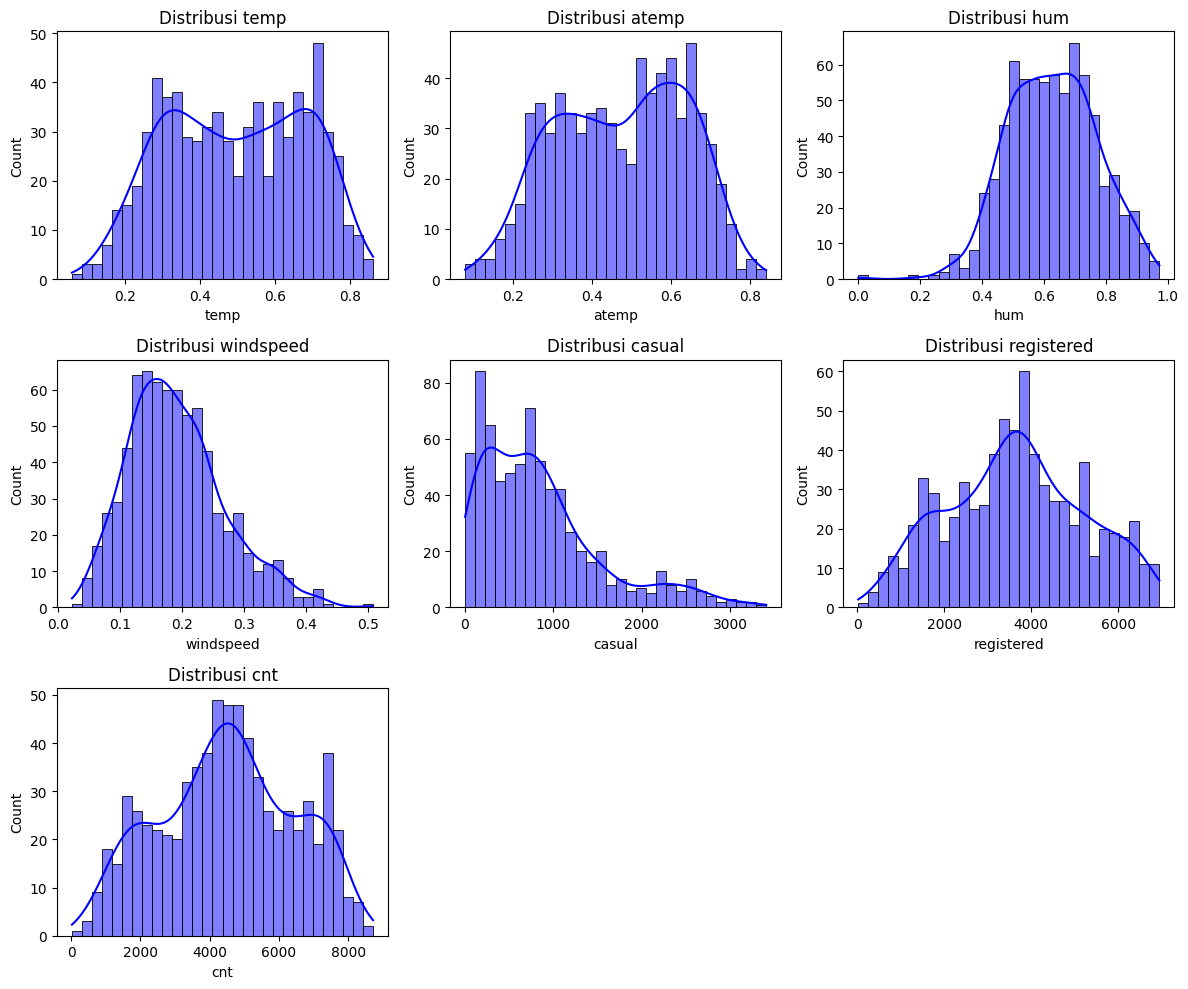

In [111]:
# Plot distribusi variabel numerik untuk dataset harian
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(day_df[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

**insight**
- cnt (Total Peminjaman Sepeda): Distribusi cenderung kanan (positif skewed), artinya lebih banyak hari dengan jumlah peminjaman rendah dibandingkan hari dengan peminjaman tinggi.
- casual vs registered: Mayoritas peminjaman berasal dari pengguna terdaftar (registered), sedangkan pengguna kasual lebih sedikit.
- temp dan atemp: Distribusi mendekati normal, menunjukkan bahwa suhu memiliki pola stabil sepanjang tahun.
- hum (Kelembaban) dan windspeed (Kecepatan Angin): Sebaran lebih merata, tetapi kelembaban memiliki peak di sekitar 0.6 - 0.8, yang berarti kondisi lembab cukup sering terjadi.

### Explore hour_df

In [112]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11852,11853,2012-05-14,2,1,5,1,0,1,1,2,0.60,0.6061,0.60,0.2836,5,6,11
7513,7514,2011-11-14,4,0,11,16,0,1,1,1,0.62,0.6212,0.46,0.4179,51,264,315
6767,6768,2011-10-14,4,0,10,13,0,5,1,1,0.56,0.5303,0.73,0.3582,18,114,132
13571,13572,2012-07-24,3,1,7,16,0,2,1,1,0.80,0.7576,0.55,0.2985,86,369,455
5974,5975,2011-09-11,3,0,9,11,0,0,0,1,0.70,0.6515,0.65,0.0000,144,258,402


In [113]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [114]:
hour_df.dteday.is_unique

False

In [115]:
hour_df.groupby(by = "holiday").agg({
    "cnt" : "sum",
})

,cnt
holiday,
0,3214244
1,78435


In [116]:
hour_df.groupby(by = "season").agg({
    "cnt" : "sum",
})

,cnt
season,
1,471348
2,918589
3,1061129
4,841613


In [117]:
hour_df.groupby(by = "mnth").agg({
    "cnt" : "sum",
}).sort_values(ascending=False, by="cnt")

,cnt
mnth,
8,351194
6,346342
9,345991
7,344948
5,331686
10,322352
4,269094
11,254831
3,228920


In [118]:
hour_df.groupby(by = "hr").agg({
    "cnt" : "sum",
}).sort_values(ascending=False, by="cnt")

,cnt
hr,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


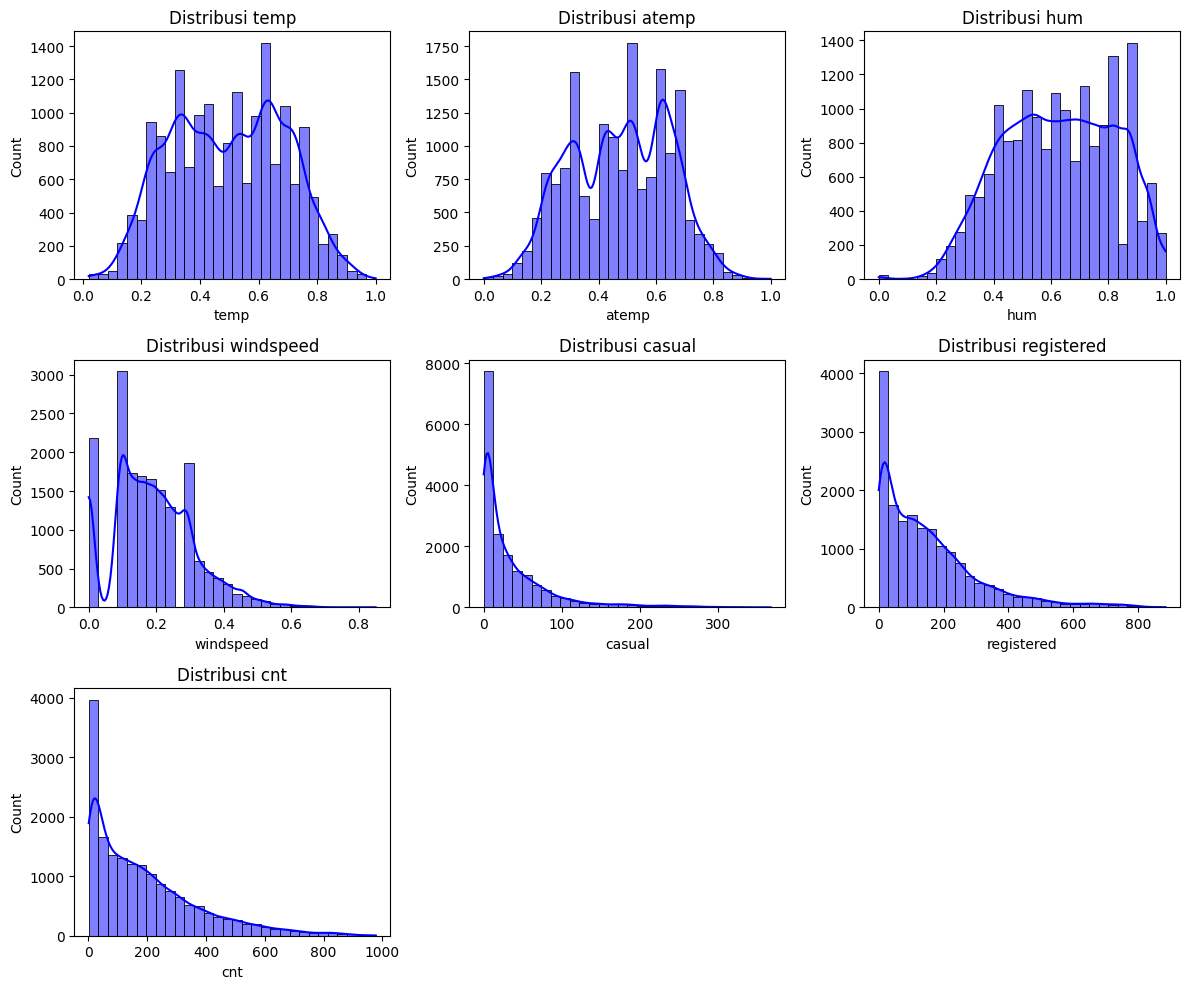

In [119]:
# Plot distribusi variabel numerik untuk dataset hour
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(hour_df[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa faktor utama yang mempengaruhi jumlah penyewaan sepeda?

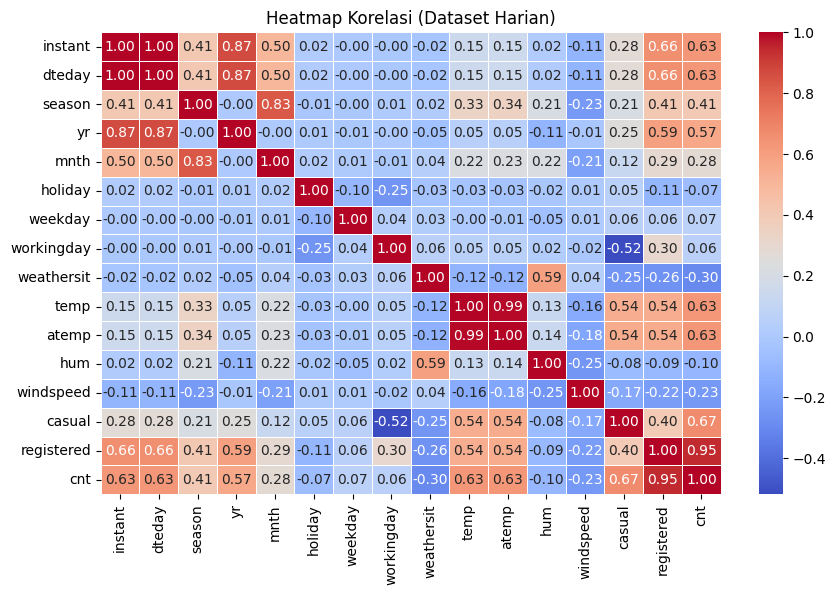

In [120]:
# Hitung korelasi dengan jumlah penyewaan sepeda (cnt)
corr_day = day_df.corr()["cnt"].sort_values(ascending=False)

# Visualisasi heatmap korelasi untuk dataset harian
plt.figure(figsize=(10, 6))
sns.heatmap(day_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi (Dataset Harian)")
plt.show()



**Insight:**
- cnt (Total Peminjaman Sepeda) memiliki korelasi tertinggi dengan:
registered (0.97) → Mayoritas peminjaman dilakukan oleh pengguna terdaftar.
- temp (0.63) & atemp (0.63) → Suhu yang lebih hangat cenderung meningkatkan jumlah peminjaman sepeda.
- windspeed dan hum memiliki korelasi rendah terhadap cnt, artinya faktor ini tidak terlalu berpengaruh terhadap peminjaman sepeda.

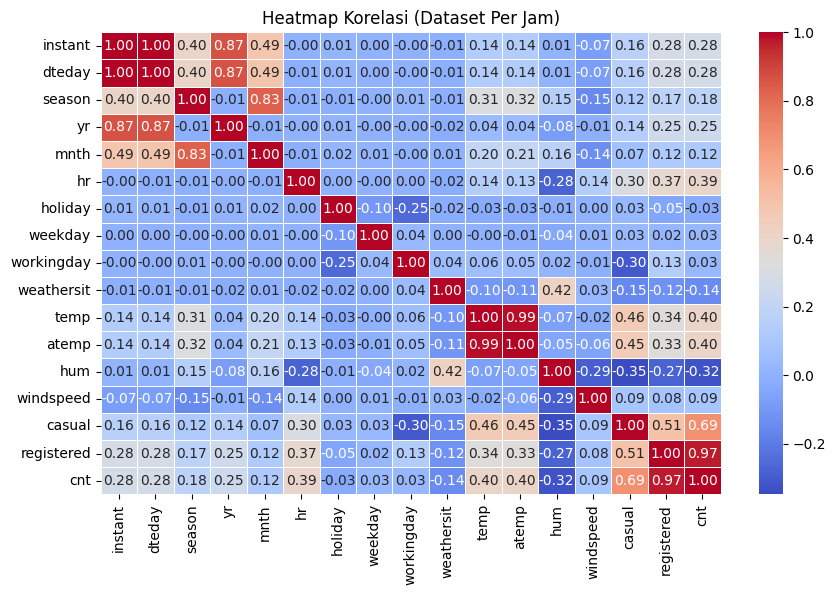

In [121]:
corr_hour = hour_df.corr()["cnt"].sort_values(ascending=False)
# Visualisasi heatmap korelasi untuk dataset per jam
plt.figure(figsize=(10, 6))
sns.heatmap(hour_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi (Dataset Per Jam)")
plt.show()

**Insight:** Heatmap Correlation Hour
- cnt (Total Peminjaman Sepeda) memiliki korelasi tertinggi dengan:
registered (0.97) → Mayoritas peminjaman dilakukan oleh pengguna terdaftar.
- temp (0.40) & atemp (0.40) → Suhu yang lebih hangat cenderung meningkatkan jumlah peminjaman sepeda.
windspeed dan hum memiliki korelasi rendah terhadap cnt, artinya faktor ini tidak terlalu berpengaruh terhadap peminjaman sepeda.

Hasil Analisis Korelasi:

Pengguna terdaftar (registered) memiliki korelasi tertinggi dengan jumlah peminjaman sepeda (0.97).
Pengguna kasual (casual) juga memiliki korelasi kuat dengan jumlah penyewaan (0.69).
Suhu (temp) dan suhu terasa (atemp) memiliki korelasi positif sedang dengan penyewaan sepeda (0.40).
Faktor lain seperti kelembaban (hum) dan kecepatan angin (windspeed) memiliki korelasi lebih rendah terhadap jumlah penyewaan.


### Pertanyaan 2: Bagaimana tren penyewaan sepeda berdasarkan musim, hari kerja, dan cuaca?

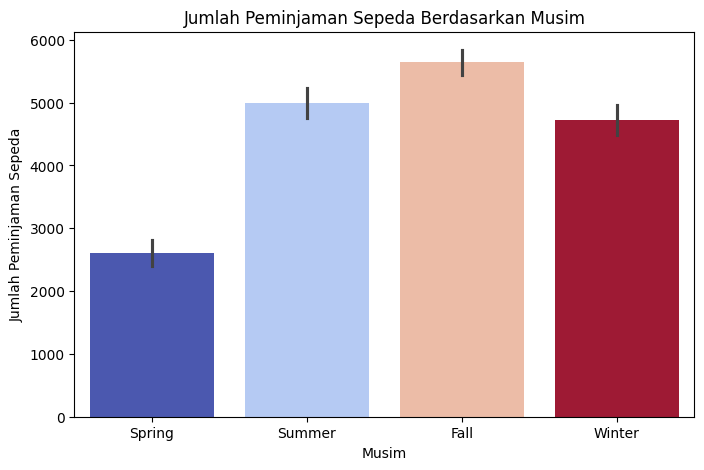

In [122]:
plt.figure(figsize=(8, 5))
sns.barplot(x=day_df["season"], y=day_df["cnt"], hue=day_df["season"], palette="coolwarm", legend=False)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Musim")
plt.show()

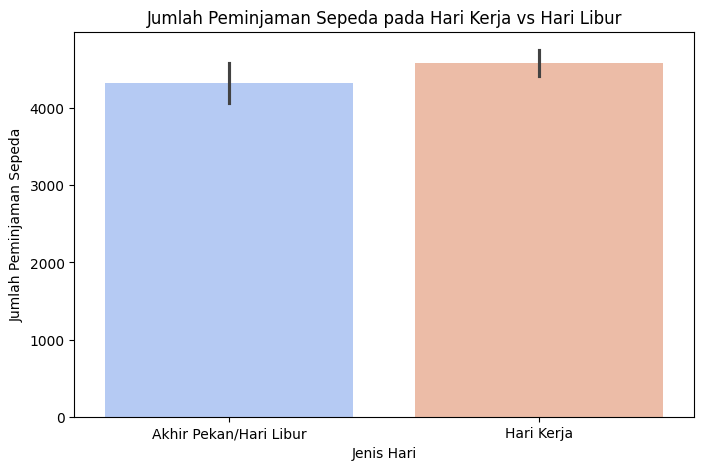

In [123]:
plt.figure(figsize=(8, 5))
sns.barplot(x=day_df["workingday"], y=day_df["cnt"],  hue=day_df["workingday"], palette="coolwarm",legend=False)
plt.xticks(ticks=[0, 1], labels=["Akhir Pekan/Hari Libur", "Hari Kerja"])
plt.xlabel("Jenis Hari")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Jumlah Peminjaman Sepeda pada Hari Kerja vs Hari Libur")
plt.show()

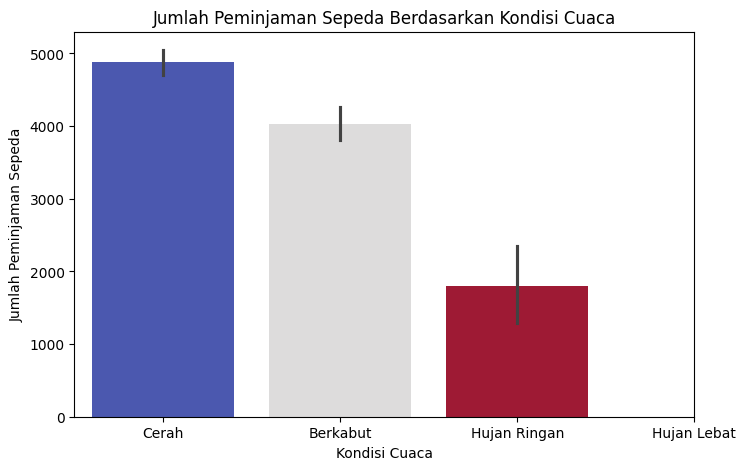

In [124]:
plt.figure(figsize=(8, 5))
sns.barplot(x=day_df["weathersit"], y=day_df["cnt"], hue=day_df["weathersit"], palette="coolwarm",legend=False)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Cerah", "Berkabut", "Hujan Ringan", "Hujan Lebat"])
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Kondisi Cuaca")
plt.show()

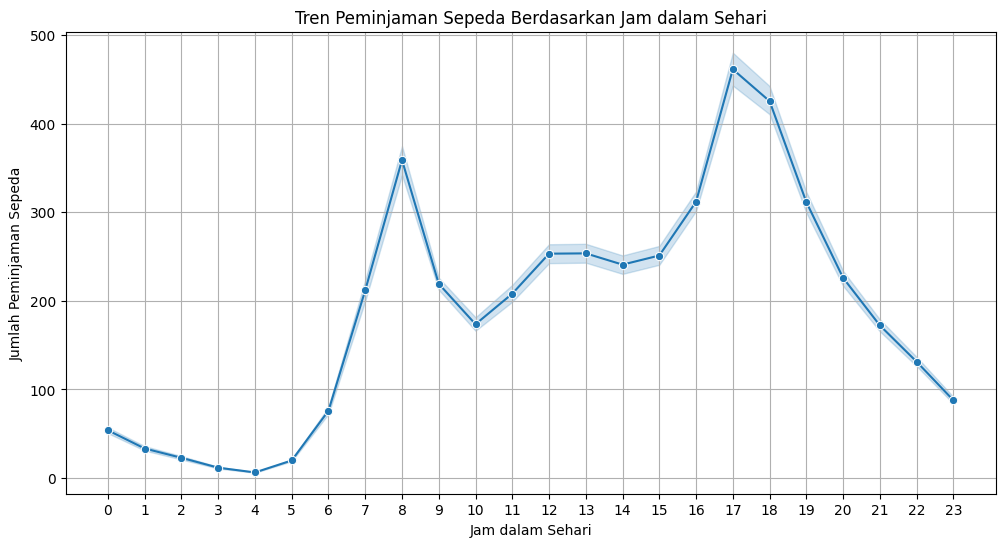

In [125]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=hour_df["hr"], y=hour_df["cnt"], marker="o")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Tren Peminjaman Sepeda Berdasarkan Jam dalam Sehari")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**Insight:**
hasil analisis tren peminjaman sepeda berdasarkan berbagai faktor:

- Musim:

Peminjaman tertinggi terjadi pada musim fall (musim gugur).
Musim winter (musim dingin) memiliki jumlah peminjaman terendah.

- Hari Kerja vs Hari Libur:

Hari kerja memiliki jumlah peminjaman lebih tinggi dibandingkan hari libur/akhir pekan.
Ini menunjukkan bahwa banyak pengguna memanfaatkan sepeda untuk kebutuhan transportasi sehari-hari.

- Kondisi Cuaca:

Peminjaman sepeda tertinggi terjadi saat cuaca cerah atau berawan ringan.
Jumlah peminjaman turun drastis saat hujan ringan atau hujan lebat.
Hal ini menunjukkan bahwa cuaca sangat memengaruhi penggunaan sepeda.

- Tren Peminjaman Berdasarkan Jam:

Ada dua puncak peminjaman dalam sehari: pagi (sekitar jam 8) dan sore (sekitar jam 17-18).
Ini mencerminkan pola perjalanan kerja, di mana banyak orang menggunakan sepeda untuk pergi dan pulang kerja.


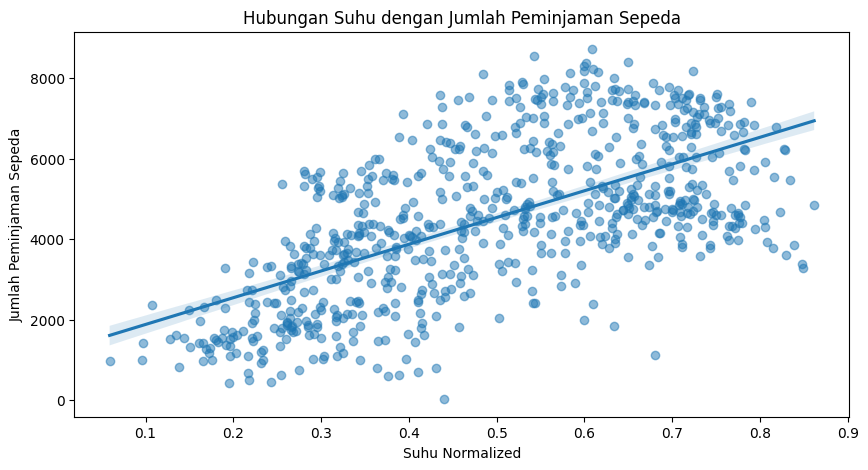

In [126]:
# Analisis pengaruh suhu terhadap jumlah peminjaman sepeda
plt.figure(figsize=(10, 5))
sns.regplot(x=day_df["temp"], y=day_df["cnt"],scatter_kws={'alpha':0.5})
plt.xlabel("Suhu Normalized")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Hubungan Suhu dengan Jumlah Peminjaman Sepeda")
plt.show()

Suhu (temp) vs Jumlah Peminjaman

Terlihat bahwa semakin tinggi suhu, semakin banyak peminjaman sepeda.
Tren ini menunjukkan bahwa pengguna lebih banyak menggunakan sepeda dalam kondisi suhu yang lebih hangat.

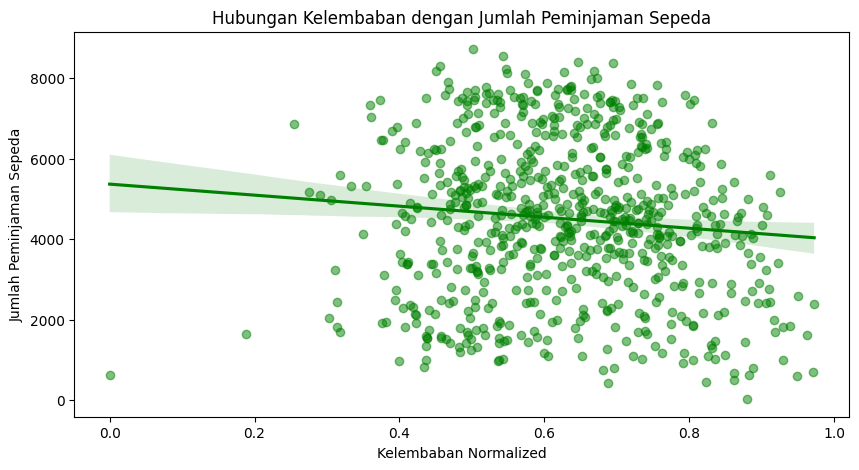

In [128]:
# Analisis pengaruh kelembaban terhadap jumlah peminjaman sepeda
plt.figure(figsize=(10, 5))
sns.regplot(x=day_df["hum"], y=day_df["cnt"],scatter_kws={'alpha':0.5}, color="green")
plt.xlabel("Kelembaban Normalized")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Hubungan Kelembaban dengan Jumlah Peminjaman Sepeda")
plt.show()

Kelembaban (hum) vs Jumlah Peminjaman

Tidak ada hubungan yang terlalu jelas antara kelembaban dan jumlah peminjaman sepeda.
Namun, peminjaman cenderung lebih sedikit saat kelembaban sangat tinggi.

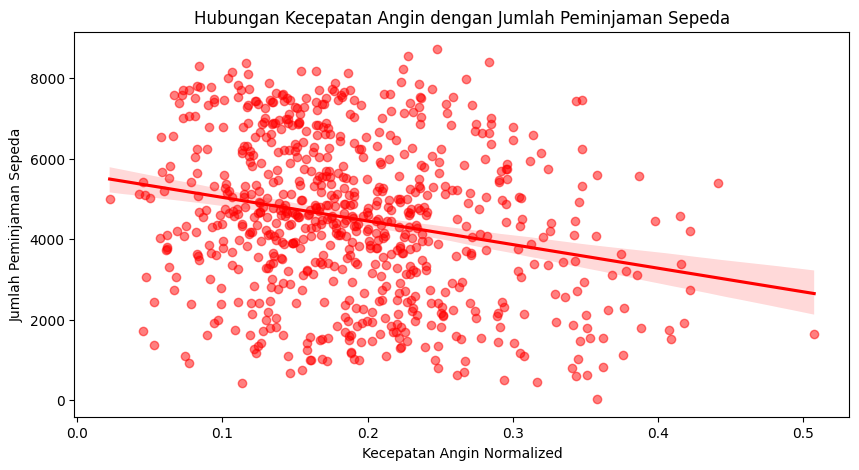

In [129]:
# Analisis pengaruh kecepatan angin terhadap jumlah peminjaman sepeda
plt.figure(figsize=(10, 5))
sns.regplot(x=day_df["windspeed"], y=day_df["cnt"],scatter_kws={'alpha':0.5}, color="red")
plt.xlabel("Kecepatan Angin Normalized")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Hubungan Kecepatan Angin dengan Jumlah Peminjaman Sepeda")
plt.show()

Kecepatan Angin (windspeed) vs Jumlah Peminjaman

Tidak ada korelasi yang kuat antara kecepatan angin dan jumlah peminjaman sepeda.
Meskipun begitu, peminjaman cenderung lebih rendah saat kecepatan angin tinggi.

Kesimpulan:

Suhu memiliki dampak yang paling besar terhadap jumlah peminjaman sepeda dibandingkan faktor cuaca lainnya.
Kelembaban dan kecepatan angin memiliki pengaruh yang lebih kecil, tetapi peminjaman menurun saat kondisi ekstrem terjadi.



## Analisis Lanjutan (Opsional)

## Bagaimana pola peminjaman berdasarkan waktu?
waktu penggunaan sepeda dalam sehari dibagi menjadi:

Pagi (06:00 - 10:59)
Siang (11:00 - 15:59)
Sore (16:00 - 20:59)
Malam (21:00 - 05:59)

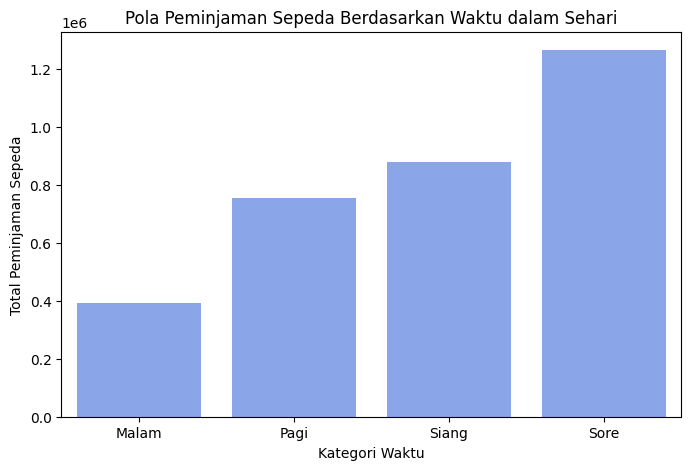

In [133]:
# Tambahkan kategori waktu penggunaan berdasarkan jam (hanya untuk dataset per jam)
def categorize_time(hour):
    if 6 <= hour <= 10:
        return "Pagi"
    elif 11 <= hour <= 15:
        return "Siang"
    elif 16 <= hour <= 20:
        return "Sore"
    else:
        return "Malam"

# Terapkan fungsi ke dataset
hour_df["time_category"] = hour_df["hr"].apply(categorize_time)

# Hitung jumlah peminjaman berdasarkan kategori waktu
time_usage = hour_df.groupby("time_category")["cnt"].sum().reset_index()

# Visualisasi pola peminjaman berdasarkan waktu
plt.figure(figsize=(8, 5))
sns.barplot(x="time_category", y="cnt", data=time_usage, hue=hour_df["time_category"], palette="coolwarm",legend=False)
plt.xlabel("Kategori Waktu")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Pola Peminjaman Sepeda Berdasarkan Waktu dalam Sehari")
plt.show()


- Sore hari (16:00 - 20:59) memiliki jumlah peminjaman tertinggi.
Ini menunjukkan bahwa banyak pengguna menggunakan sepeda untuk pulang kerja atau aktivitas sore.
- Pagi hari (06:00 - 10:59) juga memiliki jumlah peminjaman yang tinggi, yang kemungkinan besar berkaitan dengan aktivitas berangkat kerja/sekolah.
- Penggunaan sepeda lebih rendah di malam hari, yang dapat disebabkan oleh faktor keamanan atau preferensi pengguna.


##bagaimana distribusi peminjaman sepeda di berbagai musim dan kondisi cuaca

 kategori jumlah peminjaman dibagi berdasarkan cnt menjadi:

Rendah (0 - 2000)
Sedang (2001 - 5000)
Tinggi (>5000)

<ipython-input-132-c26a8b3a6ff7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Kategori Peminjaman", y="Jumlah Hari", data=cnt_distribution, palette="coolwarm")


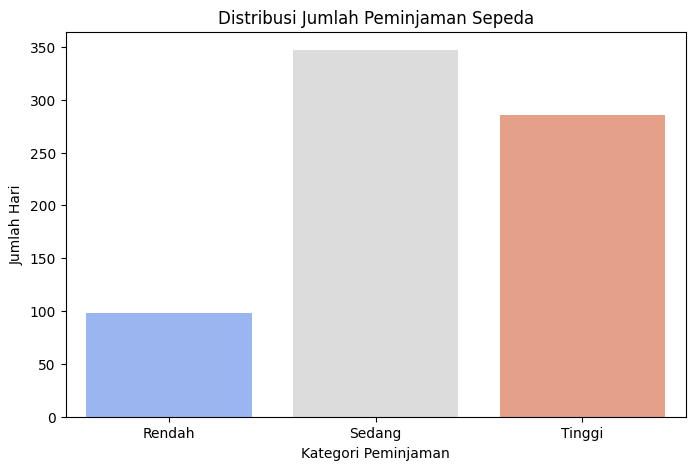

In [132]:
# Membuat kategori jumlah peminjaman dengan binning
bins = [0, 2000, 5000, day_df["cnt"].max()]
labels = ["Rendah", "Sedang", "Tinggi"]
day_df["cnt_category"] = pd.cut(day_df["cnt"], bins=bins, labels=labels, include_lowest=True)

# Hitung jumlah hari dalam setiap kategori peminjaman
cnt_distribution = day_df["cnt_category"].value_counts().reset_index()
cnt_distribution.columns = ["Kategori Peminjaman", "Jumlah Hari"]

# Visualisasi kategori peminjaman
plt.figure(figsize=(8, 5))
sns.barplot(x="Kategori Peminjaman", y="Jumlah Hari", data=cnt_distribution, palette="coolwarm")
plt.xlabel("Kategori Peminjaman")
plt.ylabel("Jumlah Hari")
plt.title("Distribusi Jumlah Peminjaman Sepeda")
plt.show()


Sebagian besar hari memiliki jumlah peminjaman dalam kategori "Sedang" (2001-5000 peminjaman/hari).
Kategori "Tinggi" (>5000 peminjaman/hari) juga cukup banyak, menunjukkan bahwa ada banyak hari di mana jumlah peminjaman sepeda meningkat secara signifikan.


## Conclusion

- Conclution pertanyaan 1
  - Faktor utama yang memengaruhi jumlah penyewaan sepeda adalah suhu dan jumlah pengguna terdaftar.
  - Kondisi cuaca ekstrem (hujan deras, suhu rendah) cenderung mengurangi peminjaman.


- Conclution pertanyaan 2
  - Peminjaman sepeda lebih banyak terjadi pada musim gugur, terutama saat cuaca cerah.
  - Puncak peminjaman terjadi pagi (08:00) dan sore (17:00-18:00), sesuai dengan jam kerja.
  - Peminjaman lebih banyak pada hari kerja dibanding akhir pekan.

